In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [2]:
#导入京东爬虫 商品的数据
data=pd.read_excel("GiftGoodsInfoSpiders.xlsx")


<img src="imgs/SPIDERS.png" width="100%">


In [3]:
# 查看数据情况
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2901
Data columns (total 11 columns):
SKU_COMMENT_NUMS    2306 non-null object
SKU_GOOD_RATE       2329 non-null object
SKU_ID              2624 non-null int64
SKU_INTRODUCE       2624 non-null object
SKU_PRICE           1877 non-null object
SKU_SIZE            2530 non-null object
SKU_LABEL1          2454 non-null object
SKU_LABEL3          2454 non-null object
SKU_LABEL5          2454 non-null object
SKU_LABEL7          2454 non-null object
SKU_TITLE           2624 non-null object
dtypes: int64(1), object(10)
memory usage: 246.0+ KB


In [4]:
#SKU_LABEL1缺失值分析
print("data[data['SKU_LABEL1'].isnull()]",len(data[data['SKU_LABEL1'].isnull()]))
data[data['SKU_LABEL1'].isnull()]
# 经过 分析得出 这些商品都是 京东国际 商品，所以爬虫没有爬到一级分类，二级分类，三级分类 之后考虑用 京东国际来替换缺失值

data[data['SKU_LABEL1'].isnull()] 170


,SKU_COMMENT_NUMS,SKU_GOOD_RATE,SKU_ID,SKU_INTRODUCE,SKU_PRICE,SKU_SIZE,SKU_LABEL1,SKU_LABEL3,SKU_LABEL5,SKU_LABEL7,SKU_TITLE
46,NaN,NaN,4816718,商品名称：德龙CTO2003橄榄绿色\n商品编号：4816718\n品牌： 德龙（Delon...,459.00 .00,主体参数\n加热方式\n电热管\n品牌\n德龙\n颜色\n白色\n容量(g)\n1000g\...,NaN,NaN,NaN,NaN,德龙(Delonghi) CTO2003.VGR多士炉 icona复古早餐系列2片式家用面包...
91,NaN,NaN,1950739,商品名称：膳魔师保温杯\n商品编号：1950739\n品牌： 膳魔师（THERMOS）\n商...,139.00 .00,主体\n净重量（kg）\n0.21\n颜色\nPWP\n型号\nJNL-500\n承受温度范...,NaN,NaN,NaN,NaN,膳魔师（THERMOS）不锈钢保温杯保温壶车载水杯男女学生杯子 500ml JNL-500 ...
178,NaN,NaN,8314939,商品名称：任天堂Switch NS\n商品编号：8314939\n品牌： 任天堂（Ninte...,NaN,主体\n型号\nSwitch NS\n品牌\n其他\n颜色\n红/蓝\n规格\nCPU\nN...,NaN,NaN,NaN,NaN,日本任天堂（Nintendo）Switch NS掌上游戏机 红蓝手柄 日版
232,NaN,NaN,100004572970,商品名称：施华洛世奇项链\n商品编号：100004572970\n品牌： 施华洛世奇（SWA...,NaN,主体\n分类\n项链\n材质\n施华洛世奇仿水晶\n适用人群\n女士\n品牌\n施华洛世奇\...,NaN,NaN,NaN,NaN,Swarovski（施华洛世奇）LUCKILY神秘元素 镀金色项链 5468916 绿色
260,NaN,NaN,5254056,商品名称：YOSHIKAWA雪平锅YH6754\n商品编号：5254056\n品牌： YOS...,169.00 .00,主体\n品牌\n吉川\n材质\n不锈钢\n规格（长宽高）\n402*240*108\n净重量...,NaN,NaN,NaN,NaN,吉川YOSHIKAWA 雪平锅汤锅奶锅泡面锅煮面锅炒锅火锅不锈钢通用行平锅 22cm日本进口
265,NaN,NaN,100002798602,商品名称：ADERIA猫爪杯三花猫款大号\n商品编号：100002798602\n品牌： A...,129.00 .00,主体\n品牌\nADERIA\n净重量（kg）\n0.1\n材质（杯体、盖子、密封圈、杯口环...,NaN,NaN,NaN,NaN,aderia 猫爪杯玻璃杯水杯 三花猫大号 日本进口石塚硝子 牛奶杯咖啡杯早餐杯酒杯喝茶花茶...
279,NaN,NaN,100004034372,商品名称：ADERIA津轻初雪锤纹\n商品编号：100004034372\n品牌： ADER...,99.00 .00,主体\n品牌\nADERIA\n净重量（kg）\n0.15\n材质（杯体、盖子、密封圈、杯口...,NaN,NaN,NaN,NaN,aderia 津轻初雪玻璃杯 日本进口石塚硝子 锤纹手工水杯白酒杯 日式花茶杯品茗清酒杯 节...
290,NaN,NaN,4643788,商品名称：moshmosh保温杯\n商品编号：4643788\n品牌： mosh\n商品毛重...,NaN,主体\n品牌\nmosh\n型号\nDMSH350SV\n材质（杯体、盖子、密封圈、杯口环、...,NaN,NaN,NaN,NaN,mosh 真空不锈钢创意调酒式子弹头型保温杯 DMSH350SV 350ml 不锈钢银色
429,NaN,NaN,40725484483,商品名称：BoseSleepbuds\n商品编号：40725484483\n店铺： Senv...,1399.00 .00,主体\n颜色\n白色\n品牌\nBOSE\n耳机规格\n音频接口\n无\n接口类型\n蓝牙\...,NaN,NaN,NaN,NaN,Bose 遮噪睡眠耳机noise masking sleepbuds 被动降噪 博士蓝牙耳塞...
499,NaN,NaN,100003671156,商品名称：AerogardAerogard安护无香型驱蚊液175ml*2\n商品编号：100...,198.00 .00,主体\n品牌\nAerogard\n包装清单\nAerogard安护无香型驱蚊液175ml*2瓶,NaN,NaN,NaN,NaN,Aerogard澳乐家澳洲婴儿驱蚊液防蚊喷雾儿童防蚊液蚊香灭蚊怕水孕妇宝宝户外防蚊虫叮咬花露...


In [5]:
data['SKU_LABEL1'] = data['SKU_LABEL1'].fillna("京东国际")
data['SKU_LABEL3'] = data['SKU_LABEL3'].fillna("京东国际")
data['SKU_LABEL5'] = data['SKU_LABEL5'].fillna("京东国际")
data['SKU_LABEL7'] = data['SKU_LABEL7'].fillna("京东国际")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2901
Data columns (total 11 columns):
SKU_COMMENT_NUMS    2306 non-null object
SKU_GOOD_RATE       2329 non-null object
SKU_ID              2624 non-null int64
SKU_INTRODUCE       2624 non-null object
SKU_PRICE           1877 non-null object
SKU_SIZE            2530 non-null object
SKU_LABEL1          2624 non-null object
SKU_LABEL3          2624 non-null object
SKU_LABEL5          2624 non-null object
SKU_LABEL7          2624 non-null object
SKU_TITLE           2624 non-null object
dtypes: int64(1), object(10)
memory usage: 246.0+ KB


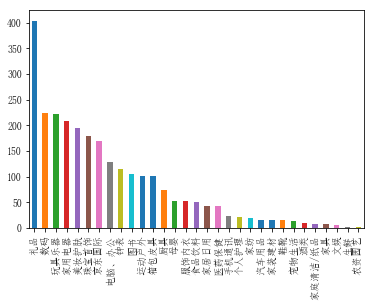

In [7]:

data['SKU_LABEL1'].value_counts().plot.bar()
plt.show()

In [8]:
data['SKU_LABEL1'].value_counts()

礼品         404
数码         223
玩具乐器       222
家用电器       208
美妆护肤       195
珠宝首饰       180
京东国际       170
电脑、办公      128
钟表         115
图书         105
运动户外       101
箱包皮具       101
厨具          73
母婴          53
服饰内衣        53
食品饮料        50
家居日用        43
医药保健        43
手机通讯        23
个人护理        22
家纺          20
汽车用品        15
家装建材        15
鞋靴          15
宠物生活        14
酒类          10
家庭清洁/纸品      8
家具           7
文娱           6
生鲜           1
农资园艺         1
Name: SKU_LABEL1, dtype: int64

In [9]:
#根据 label 和title 进行性别分析
def filter_sex(x):
    SKU_LABEL1=x['SKU_LABEL1']
    SKU_LABEL3=x['SKU_LABEL3']
    SKU_LABEL5=x['SKU_LABEL5']
    SKU_LABEL7=x['SKU_LABEL7']
    SKU_INTRODUCE=x['SKU_INTRODUCE']
    SKU_TITLE=x['SKU_TITLE']
    doc=str(SKU_LABEL1)+str(SKU_LABEL3)+str(SKU_LABEL5)+str(SKU_LABEL7)+str(SKU_INTRODUCE)+str(SKU_TITLE)
    if "男" in doc or "女" in doc or "闺蜜" in doc or "老公" in doc or "老婆" in doc :
        return 1 #如过能判断出性别 输出1
    return 0  #如果不能判断出性别输出0
data["sex"]=data.apply(filter_sex,axis=1)


In [10]:
print("直接通过以上规则判断男女的数量是%s，占总数量的百分之%s"%(len(data[data["sex"]==1]),len(data[data["sex"]==1])/len(data)*100))
data[data["sex"]==1].head()

直接通过以上规则判断男女的数量是1221，占总数量的百分之46.53201219512195


,SKU_COMMENT_NUMS,SKU_GOOD_RATE,SKU_ID,SKU_INTRODUCE,SKU_PRICE,SKU_SIZE,SKU_LABEL1,SKU_LABEL3,SKU_LABEL5,SKU_LABEL7,SKU_TITLE,sex
1,2200+,98%,54354762692,品牌： 酷多多（COdUOO）\n商品名称：酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创...,88.00,主体\n品牌\n酷多多\n颜色\n白色、粉色、蓝色\n产品类别\n创意家居\n材质\n塑料\...,礼品,礼品,创意礼品,创意礼品,酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创意礼品猫咪灯萌猫加湿器抖音同款 粉色宠屋灯+猫咪,1
2,40+,100%,51450580613,品牌： 童粟排（TONSU PAI）\n商品名称：生日礼物女猫咪创意LED台灯USB充电护眼...,59.00,主体\n品牌\n/\n材质\n/\n净尺寸(mm)\n/\n净重(KG)\n/\n颜色\n/...,礼品,礼品,创意礼品,创意礼品,生日礼物女猫咪创意LED台灯USB充电护眼灯走心的礼物网红ins可爱卡通学生特别实用圣诞节送...,1
3,0,100%,52138915372,品牌： 堪德斯\n商品名称：创意可爱小猫杯子陶瓷马克杯清新水果色水杯咖啡杯生日礼物送女生 草...,118.00,主体\n品牌\n堪德斯\n材质（杯体、盖子、密封圈、杯口环、茶网）\n陶瓷\n保温时间\n是...,厨具,水具酒具,陶瓷/马克杯,陶瓷/马克杯,创意可爱小猫杯子陶瓷马克杯清新水果色水杯咖啡杯生日礼物送女生 草木绿杯里面小猫,1
4,70+,100%,45600780385,品牌： 优贰\n商品名称：生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫...,79.00,主体\n品牌\n优贰\n材质\n其它\n净尺寸(mm)\n110\n净重(KG)\n0.39...,礼品,礼品,创意礼品,创意礼品,生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫灯母亲节送女朋友闺蜜实用创...,1
5,10+,100%,42843004405,品牌： 娆蝶\n商品名称：娆蝶 丝巾女秋冬季新款韩国雪纺绸缎仿真丝长条飘带绑包包宽丝带小领巾...,39.00,"规格参数\n颜色\n彩色千鸟格蓝(绸缎),粉嫩豹点猫咪(绸缎),欢乐小\n款式\n中长\n材...",服饰内衣,服饰配件,女士丝巾/围巾/披肩,女士丝巾/围巾/披肩,娆蝶 丝巾女秋冬季新款韩国雪纺绸缎仿真丝长条飘带绑包包宽丝带小领巾 俏皮猫咪(雪纺),1


In [11]:
#对未能直接通过规则的商品进行分析
unsex_data=data[data["sex"]==0]
#查看label的分布
unsex_data['SKU_LABEL1'].value_counts()#通过查看 label1 分布可知 美妆护肤 母婴 珠宝首饰 服饰内衣
print(unsex_data['SKU_LABEL3'].value_counts())#通过查看 label3 分布可知 香水彩妆 面部护肤 婴童寝居 美发假发/造型
unsex_data['SKU_LABEL5'].value_counts()#通过查看 label3 分布可知 口红
#综上 根据一些规则 还有爬取的 分类 可以大致判断商品属于男女的类型的

京东国际       107
个护健康        97
影音娱乐        85
香水彩妆        59
文具          57
面部护肤        51
智能设备        50
礼品          45
保健器械        41
厨房小电        40
生活电器        38
电子教育        37
奢侈品         31
外设产品        29
童书          28
茗茶          27
益智玩具        26
摄影摄像        23
办公设备        23
茶具          22
家装软饰        20
水具酒具        16
身体护理        15
手机配件        15
体育用品        14
遥控/电动       13
厨房配件        12
黄金          12
生活日用        11
灯饰照明        11
          ... 
模型玩具         2
毛绒布艺         2
食品礼券         2
哲学/宗教        2
口腔护理         2
K金饰品         2
洗发护发         1
电脑整机         1
瑜伽舞蹈         1
钟表配件         1
乳品冷饮         1
视听影音         1
婴童寝居         1
翡翠           1
尿裤湿巾         1
阳台/户外        1
厨房卫浴         1
游泳用品         1
家电配件         1
教育音像         1
电脑组件         1
洗护美容         1
绘画/DIY       1
西洋打击乐器       1
美发假发/造型      1
粮油调味         1
五金工具         1
安全自驾         1
鲜花速递         1
儿童家具         1
Name: SKU_LABEL3, Length: 130, dtype: int64


京东国际       107
音箱/音响       38
笔类          37
耳机/耳麦       37
创意礼品        32
按摩器         28
套装/礼盒       18
早教启智        18
美容器         18
拍立得         17
智能机器人       17
键盘          16
电动牙刷        16
口红          16
配件          16
助听器         14
饰品          12
香薰蜡烛        11
足浴盆         11
学生文具        10
投影机         10
翻译机          9
面部精华         9
血压计          9
打印机          9
鼠标           8
本册/便签        8
保暖防护         8
学生平板         8
手工/游戏        8
          ... 
内存           1
头枕腰靠         1
便携/无线音箱      1
投资金          1
穿戴装备         1
瑞表           1
毛线手套         1
假牙清洁         1
棒球帽          1
奶酪黄油         1
瑜伽垫          1
干花           1
面            1
播放器/DVD      1
牛奶乳品         1
爽肤水/化妆水      1
电陶炉          1
花果茶          1
牙刷           1
办公文具         1
卷纸           1
数据线          1
帐篷/垫子        1
中国象棋         1
香皂           1
拼图           1
工艺礼品         1
竖笛           1
双翘板          1
湿巾           1
Name: SKU_LABEL5, Length: 366, dtype: int64

In [12]:
#经分析 SKU_INTRODUCE  SKU_SIZE里面比较有价值的字段
sku_intro=[ '送礼对象', '适用星座','适合节日', '适用生肖', '功能', '适用场景',
'适用人群','适用人数','产品定位','使用场景','适用季节','适用范围','适用对象',
'功能用途','适合年龄','年龄范围','目标对象','年龄组','适合年龄','【适用年龄】',
'功能场景','应用场景']
sku_size=['适用人群','适用场景','适用对象']
def filter_intro(x):
    arr=str(x).strip().split("\n")
    sku={}
    for i in arr:
        if "：" in i :
            if len(i.split("："))==2:
                k=i.split("：")[0].strip()
                v=i.split("：")[1].strip()
                if len(k)>15:continue
                if v=="":continue
                v=i.split("：")[1].strip()
                if k in sku_intro:
                    sku.update({k:v})
    return sku if len(sku)>0 else None
def filter_size(x):
    sku={}
    arr=str(x).splitlines()
    if len(arr)<2:return {}
    for i in range(len(arr)):
        if str(arr[i]).strip() in sku_size:
            try:
                sku.update({str(arr[i]).strip():str(arr[i+1]).strip()})
            except:
                pass
    
    return sku if len(sku)>0 else None

data['SKU_INTRODUCE_CLEAN']=data['SKU_INTRODUCE'].apply(filter_intro)
data['SKU_SIZE_CLEAN']=data['SKU_SIZE'].apply(filter_size)

In [13]:
data['SKU_INTRODUCE_CLEAN']

0                                                    None
1       {'送礼对象': '爱人，朋友，领导，儿童，客户', '适用星座': '处女座', '适合节...
2       {'送礼对象': '爱人，朋友，领导，儿童，长辈', '适合节日': '情人节，520情人节...
3                                           {'功能': '带杯盖'}
4       {'适合节日': '情人节，520情人节，白色情人节，七夕，感恩节，母亲节，教师节，女人节，...
5                        {'适用人群': '少女，青年，中年，老年，情侣，亲子，儿童'}
6                        {'适用人群': '少女，青年，中年，老年，情侣，亲子，儿童'}
7                                                    None
8       {'送礼对象': '爱人，朋友', '适合节日': '情人节，520情人节，白色情人节，圣诞...
9       {'功能': '可发光', '适用人群': '送爱人，送朋友，送领导，送儿童，送长辈，送客户...
10                                                   None
11                                                   None
12      {'送礼对象': '爱人，朋友，儿童，客户', '适合节日': '感恩节，圣诞节，儿童节',...
13                                                   None
14                                                   None
15           {'送礼对象': '爱人，朋友，客户，家人', '适用场景': '居家，车载，办公室'}
16                                                   None
17      {'送礼对象

In [14]:
#对年龄的分析思路
#根据title 对年龄的提取 如[9-10]
#根据 商品详情 与商品规格包装 对 使用对象的提取
# 根据title 对疑似年龄的描述提取 如 少女 儿童 男女朋友 送父母

def filter_age(x):
    SKU_TITLE=x["SKU_TITLE"]
    SKU_INTRODUCE=x['SKU_INTRODUCE']
    SKU_SIZE=x['SKU_SIZE']
    if "[" in SKU_TITLE and  any(char.isdigit() for char in SKU_TITLE):
        return 1
    for item in ["少女",'女士','情侣','儿童','青年']:
        if item in SKU_TITLE:
            return 1
    for item in ["送礼对象",'适用人群','使用场景','适合年龄','年龄范围','年龄组','适合年龄','【适用年龄】']:
        if item in str(SKU_INTRODUCE) or item in str(SKU_SIZE):
            return 1
    return 0
data["filter_age"]=data.apply(filter_age,axis=1)

In [15]:
age_data=data[data["filter_age"]==1]
print("直接通过以上规则判断年龄范围的数量是%s，占总数量的百分之%s"%(len(age_data),len(age_data)/len(data)*100))
age_data.head()

直接通过以上规则判断年龄范围的数量是1493，占总数量的百分之56.89786585365854


,SKU_COMMENT_NUMS,SKU_GOOD_RATE,SKU_ID,SKU_INTRODUCE,SKU_PRICE,SKU_SIZE,SKU_LABEL1,SKU_LABEL3,SKU_LABEL5,SKU_LABEL7,SKU_TITLE,sex,SKU_INTRODUCE_CLEAN,SKU_SIZE_CLEAN,filter_age
0,1.6万+,99%,27026831696,品牌： 华为（HUAWEI）\n商品名称：华为原装荣耀手环3/4/5/3pro适配充电器 华...,28.00,主体\n型号\n其他\n颜色\n黑\n适用人群\n男士；通用\n其他参数\n续航时间\n7天...,数码,智能设备,智能手环,智能手环,华为原装荣耀手环3/4/5/3pro适配充电器 华为运动手环ERS-B19/b29充电底座 ...,0,None,{'适用人群': '男士；通用'},1
1,2200+,98%,54354762692,品牌： 酷多多（COdUOO）\n商品名称：酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创...,88.00,主体\n品牌\n酷多多\n颜色\n白色、粉色、蓝色\n产品类别\n创意家居\n材质\n塑料\...,礼品,礼品,创意礼品,创意礼品,酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创意礼品猫咪灯萌猫加湿器抖音同款 粉色宠屋灯+猫咪,1,"{'送礼对象': '爱人，朋友，领导，儿童，客户', '适用星座': '处女座', '适合节...",None,1
2,40+,100%,51450580613,品牌： 童粟排（TONSU PAI）\n商品名称：生日礼物女猫咪创意LED台灯USB充电护眼...,59.00,主体\n品牌\n/\n材质\n/\n净尺寸(mm)\n/\n净重(KG)\n/\n颜色\n/...,礼品,礼品,创意礼品,创意礼品,生日礼物女猫咪创意LED台灯USB充电护眼灯走心的礼物网红ins可爱卡通学生特别实用圣诞节送...,1,"{'送礼对象': '爱人，朋友，领导，儿童，长辈', '适合节日': '情人节，520情人节...",None,1
4,70+,100%,45600780385,品牌： 优贰\n商品名称：生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫...,79.00,主体\n品牌\n优贰\n材质\n其它\n净尺寸(mm)\n110\n净重(KG)\n0.39...,礼品,礼品,创意礼品,创意礼品,生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫灯母亲节送女朋友闺蜜实用创...,1,{'适合节日': '情人节，520情人节，白色情人节，七夕，感恩节，母亲节，教师节，女人节，...,None,1
5,10+,100%,42843004405,品牌： 娆蝶\n商品名称：娆蝶 丝巾女秋冬季新款韩国雪纺绸缎仿真丝长条飘带绑包包宽丝带小领巾...,39.00,"规格参数\n颜色\n彩色千鸟格蓝(绸缎),粉嫩豹点猫咪(绸缎),欢乐小\n款式\n中长\n材...",服饰内衣,服饰配件,女士丝巾/围巾/披肩,女士丝巾/围巾/披肩,娆蝶 丝巾女秋冬季新款韩国雪纺绸缎仿真丝长条飘带绑包包宽丝带小领巾 俏皮猫咪(雪纺),1,{'适用人群': '少女，青年，中年，老年，情侣，亲子，儿童'},None,1


In [16]:

#对场景的提取
def filter_scene(x):
    SKU_INTRODUCE=x['SKU_INTRODUCE']
    SKU_SIZE=x['SKU_SIZE']
    for item in ["适用场景",'适合节日','功能场景','应用场景']:
        if item in str(SKU_INTRODUCE) or item in str(SKU_SIZE):
            return 1
    return 0
data["filter_scene"]=data.apply(filter_scene,axis=1)

In [17]:
scene_data=data[data["filter_scene"]==1]
print("直接通过以上规则判断场景的数量是%s，占总数量的百分之%s"%(len(scene_data),len(scene_data)/len(data)*100))
scene_data.head()

直接通过以上规则判断场景的数量是609，占总数量的百分之23.208841463414632


,SKU_COMMENT_NUMS,SKU_GOOD_RATE,SKU_ID,SKU_INTRODUCE,SKU_PRICE,SKU_SIZE,SKU_LABEL1,SKU_LABEL3,SKU_LABEL5,SKU_LABEL7,SKU_TITLE,sex,SKU_INTRODUCE_CLEAN,SKU_SIZE_CLEAN,filter_age,filter_scene
1,2200+,98%,54354762692,品牌： 酷多多（COdUOO）\n商品名称：酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创...,88.00,主体\n品牌\n酷多多\n颜色\n白色、粉色、蓝色\n产品类别\n创意家居\n材质\n塑料\...,礼品,礼品,创意礼品,创意礼品,酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创意礼品猫咪灯萌猫加湿器抖音同款 粉色宠屋灯+猫咪,1,"{'送礼对象': '爱人，朋友，领导，儿童，客户', '适用星座': '处女座', '适合节...",None,1,1
2,40+,100%,51450580613,品牌： 童粟排（TONSU PAI）\n商品名称：生日礼物女猫咪创意LED台灯USB充电护眼...,59.00,主体\n品牌\n/\n材质\n/\n净尺寸(mm)\n/\n净重(KG)\n/\n颜色\n/...,礼品,礼品,创意礼品,创意礼品,生日礼物女猫咪创意LED台灯USB充电护眼灯走心的礼物网红ins可爱卡通学生特别实用圣诞节送...,1,"{'送礼对象': '爱人，朋友，领导，儿童，长辈', '适合节日': '情人节，520情人节...",None,1,1
4,70+,100%,45600780385,品牌： 优贰\n商品名称：生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫...,79.00,主体\n品牌\n优贰\n材质\n其它\n净尺寸(mm)\n110\n净重(KG)\n0.39...,礼品,礼品,创意礼品,创意礼品,生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫灯母亲节送女朋友闺蜜实用创...,1,{'适合节日': '情人节，520情人节，白色情人节，七夕，感恩节，母亲节，教师节，女人节，...,None,1,1
8,3,100%,50597016337,品牌： kikkerland\n商品名称：Kikkerland首饰架树饰品架耳环架子展示架家...,105.00,主体\n品牌\nKikkerland\n型号\nJK14\n材质\n钢，磁铁\n净尺寸(mm...,礼品,礼品,创意礼品,创意礼品,Kikkerland首饰架树饰品架耳环架子展示架家用收纳创意小猫首饰盒挂项链耳饰饰品架家居日...,1,"{'送礼对象': '爱人，朋友', '适合节日': '情人节，520情人节，白色情人节，圣诞...",None,1,1
9,4,100%,32157166538,品牌： kikkerland\n商品名称：Kikkerland钥匙扣黑暗中的黑猫探长钥匙圈动...,47.00,主体\n品牌\nkikkerland\n型号\nKRL21-CDU\n材质\n塑料\n净尺寸...,礼品,礼品,创意礼品,创意礼品,Kikkerland钥匙扣黑暗中的黑猫探长钥匙圈动物造型自带手电筒灯光照明钥匙环美国特色礼品...,1,"{'功能': '可发光', '适用人群': '送爱人，送朋友，送领导，送儿童，送长辈，送客户...",None,1,1


In [18]:
# 无监督学习 词向量训练
print(data.columns)
data.head()

Index(['SKU_COMMENT_NUMS', 'SKU_GOOD_RATE', 'SKU_ID', 'SKU_INTRODUCE',
       'SKU_PRICE', 'SKU_SIZE', 'SKU_LABEL1', 'SKU_LABEL3', 'SKU_LABEL5',
       'SKU_LABEL7', 'SKU_TITLE', 'sex', 'SKU_INTRODUCE_CLEAN',
       'SKU_SIZE_CLEAN', 'filter_age', 'filter_scene'],
      dtype='object')


,SKU_COMMENT_NUMS,SKU_GOOD_RATE,SKU_ID,SKU_INTRODUCE,SKU_PRICE,SKU_SIZE,SKU_LABEL1,SKU_LABEL3,SKU_LABEL5,SKU_LABEL7,SKU_TITLE,sex,SKU_INTRODUCE_CLEAN,SKU_SIZE_CLEAN,filter_age,filter_scene
0,1.6万+,99%,27026831696,品牌： 华为（HUAWEI）\n商品名称：华为原装荣耀手环3/4/5/3pro适配充电器 华...,28.00,主体\n型号\n其他\n颜色\n黑\n适用人群\n男士；通用\n其他参数\n续航时间\n7天...,数码,智能设备,智能手环,智能手环,华为原装荣耀手环3/4/5/3pro适配充电器 华为运动手环ERS-B19/b29充电底座 ...,0,None,{'适用人群': '男士；通用'},1,0
1,2200+,98%,54354762692,品牌： 酷多多（COdUOO）\n商品名称：酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创...,88.00,主体\n品牌\n酷多多\n颜色\n白色、粉色、蓝色\n产品类别\n创意家居\n材质\n塑料\...,礼品,礼品,创意礼品,创意礼品,酷多多 送女朋友生日礼物女生女友闺蜜特别的走心创意礼品猫咪灯萌猫加湿器抖音同款 粉色宠屋灯+猫咪,1,"{'送礼对象': '爱人，朋友，领导，儿童，客户', '适用星座': '处女座', '适合节...",None,1,1
2,40+,100%,51450580613,品牌： 童粟排（TONSU PAI）\n商品名称：生日礼物女猫咪创意LED台灯USB充电护眼...,59.00,主体\n品牌\n/\n材质\n/\n净尺寸(mm)\n/\n净重(KG)\n/\n颜色\n/...,礼品,礼品,创意礼品,创意礼品,生日礼物女猫咪创意LED台灯USB充电护眼灯走心的礼物网红ins可爱卡通学生特别实用圣诞节送...,1,"{'送礼对象': '爱人，朋友，领导，儿童，长辈', '适合节日': '情人节，520情人节...",None,1,1
3,0,100%,52138915372,品牌： 堪德斯\n商品名称：创意可爱小猫杯子陶瓷马克杯清新水果色水杯咖啡杯生日礼物送女生 草...,118.00,主体\n品牌\n堪德斯\n材质（杯体、盖子、密封圈、杯口环、茶网）\n陶瓷\n保温时间\n是...,厨具,水具酒具,陶瓷/马克杯,陶瓷/马克杯,创意可爱小猫杯子陶瓷马克杯清新水果色水杯咖啡杯生日礼物送女生 草木绿杯里面小猫,1,{'功能': '带杯盖'},None,0,0
4,70+,100%,45600780385,品牌： 优贰\n商品名称：生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫...,79.00,主体\n品牌\n优贰\n材质\n其它\n净尺寸(mm)\n110\n净重(KG)\n0.39...,礼品,礼品,创意礼品,创意礼品,生日礼物 女生猫咪灭蚊灯黑科技灭蚊器无辐射静音家用宿舍灭蝇灯捕蚊虫灯母亲节送女朋友闺蜜实用创...,1,{'适合节日': '情人节，520情人节，白色情人节，七夕，感恩节，母亲节，教师节，女人节，...,None,1,1


In [19]:
#https://www.cnblogs.com/zongfa/p/9556864.html  jieba
#https://zhuanlan.zhihu.com/p/24961011  gensim word2vec

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2901
Data columns (total 16 columns):
SKU_COMMENT_NUMS       2306 non-null object
SKU_GOOD_RATE          2329 non-null object
SKU_ID                 2624 non-null int64
SKU_INTRODUCE          2624 non-null object
SKU_PRICE              1877 non-null object
SKU_SIZE               2530 non-null object
SKU_LABEL1             2624 non-null object
SKU_LABEL3             2624 non-null object
SKU_LABEL5             2624 non-null object
SKU_LABEL7             2624 non-null object
SKU_TITLE              2624 non-null object
sex                    2624 non-null int64
SKU_INTRODUCE_CLEAN    1444 non-null object
SKU_SIZE_CLEAN         685 non-null object
filter_age             2624 non-null int64
filter_scene           2624 non-null int64
dtypes: int64(4), object(12)
memory usage: 348.5+ KB


In [21]:
# 先尝试使用title 进行词向量训练  分词使用jieba  训练词向量的时候不需要去除停用词
import jieba
from gensim.models import word2vec
sentences=[]
def filter_title(x):   
    sentences.append(jieba.lcut(x))
    
data["SKU_TITLE"].apply(filter_title)
print(sentences[:10])

D:\Users\20180602\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\20180602\AppData\Local\Temp\jieba.cache
Loading model cost 0.542 seconds.
Prefix dict has been built succesfully.


[['华为', '原装', '荣耀', '手环', '3', '/', '4', '/', '5', '/', '3pro', '适配', '充电器', ' ', '华为', '运动', '手环', 'ERS', '-', 'B19', '/', 'b29', '充电', '底座', ' ', '京东', '限时', '达', '充电', '底座'], ['酷', '多多', ' ', '送', '女朋友', '生日礼物', '女生', '女友', '闺蜜', '特别', '的', '走心', '创意', '礼品', '猫咪', '灯萌', '猫', '加湿器', '抖音', '同款', ' ', '粉色', '宠屋', '灯', '+', '猫咪'], ['生日礼物', '女', '猫咪', '创意', 'LED', '台灯', 'USB', '充电', '护眼灯', '走心', '的', '礼物', '网红', 'ins', '可爱', '卡通', '学生', '特别', '实用', '圣诞节', '送', '女友', '闺蜜', ' ', '绿色'], ['创意', '可爱', '小猫', '杯子', '陶瓷', '马克杯', '清新', '水果', '色', '水杯', '咖啡杯', '生日礼物', '送', '女生', ' ', '草木', '绿杯', '里面', '小猫'], ['生日礼物', ' ', '女生', '猫咪', '灭蚊灯', '黑', '科技', '灭蚊器', '无辐射', '静音', '家用', '宿舍', '灭蝇', '灯捕', '蚊虫', '灯', '母亲节', '送', '女朋友', '闺蜜', '实用', '创意', '礼品', ' ', '白色'], ['娆', '蝶', ' ', '丝巾', '女', '秋冬季', '新款', '韩国', '雪纺', '绸缎', '仿真', '丝', '长条', '飘带', '绑', '包包', '宽', '丝带', '小', '领巾', ' ', '俏皮', '猫咪', '(', '雪纺', ')'], ['娆', '蝶', ' ', '小', '方巾', '女', '秋冬季', 'chic', '发带', '仿真', '丝', '职业', '小', '领巾', '新款', '围巾', '

In [23]:
# 构建word2vec模型
model = word2vec.Word2Vec(sentences, min_count=5,size=100)

In [24]:
# 进行相关性比较
model.similarity('华为','小米')

D:\Users\20180602\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
D:\Users\20180602\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9997853

In [25]:
model.most_similar(['华为'])

D:\Users\20180602\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
D:\Users\20180602\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('手机', 0.9998195171356201),
 ('小米', 0.9997852444648743),
 ('运动', 0.9997710585594177),
 ('通用', 0.9997639060020447),
 ('便携', 0.9997567534446716),
 ('智能', 0.9997519850730896),
 ('迷你', 0.9997465014457703),
 ('苹果', 0.9997377991676331),
 ('手环', 0.9997295141220093),
 ('键盘', 0.9997094869613647)]

In [26]:
model['华为'] 

D:\Users\20180602\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.15996142,  0.02670396, -0.04143312,  0.21650961,  0.00090638,
       -0.0999429 ,  0.02939229,  0.3832838 ,  0.13975765,  0.13598877,
       -0.07229526,  0.07899009,  0.31162882, -0.04465331,  0.04068742,
       -0.25629368,  0.20399606,  0.05967192,  0.0742023 , -0.04033676,
        0.02876527,  0.21590316, -0.11012442, -0.06114697, -0.2223005 ,
        0.15467195, -0.0640937 , -0.06262577, -0.03176555,  0.21340564,
        0.1334985 , -0.2817243 ,  0.14075649,  0.00141052,  0.30562618,
       -0.32979354,  0.179245  ,  0.22340515, -0.18089548, -0.24236245,
       -0.14274928,  0.03455099, -0.13039325, -0.40566978,  0.05516616,
       -0.20604283, -0.0943816 ,  0.05594501, -0.15303707,  0.24655797,
       -0.31390047, -0.05432081, -0.30628803, -0.07973029,  0.11465245,
        0.49418017,  0.07377242, -0.23098604, -0.11285173,  0.11565324,
        0.02763081,  0.11935727, -0.05356508, -0.04805975, -0.1974049 ,
       -0.3262317 , -0.02176285,  0.14325878,  0.19353399, -0.01

In [ ]:
#进行特征提取：词频，TFIDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_trainCounts = count_vect.fit_transform(newsTrain.data) 
X_testCounts = count_vect.transform(newsTest.data)
X_trainTfidf = tfidf_transformer.fit_transform(X_trainCounts) 
X_testTfidf = tfidf_transformer.transform(X_testCounts)


In [ ]:
#https://www.ctolib.com/AimeeLee77-keyword_extraction.html python 关键词提取

<h1>采用TF-IDF方法提取文本关键词</h1>

In [27]:
import jieba.posseg
import jieba.analyse
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import sys,codecs

In [28]:
def dataPrepos(text, stopkey):
    l = []
    pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    seg = jieba.posseg.cut(text)  # 分词
    for i in seg:
        if i.word not in stopkey and i.flag in pos:  # 去停用词 + 词性筛选
            l.append(i.word)
    return l


# tf-idf获取文本top10关键词
def getKeywords_tfidf(data,stopkey,topK):
#     idList, titleList, abstractList = data['id'], data['title'], data['abstract']
    idList,titleList =list(data['SKU_ID'].values),list(data['SKU_TITLE'].values)
    corpus = [] # 将所有文档输出到一个list中，一行就是一个文档
    for text in titleList:
        text = dataPrepos(text,stopkey) # 文本预处理
        text = " ".join(text) # 连接成字符串，空格分隔
        corpus.append(text)

    # 1、构建词频矩阵，将文本中的词语转换成词频矩阵
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus) # 词频矩阵,a[i][j]:表示j词在第i个文本中的词频
    # 2、统计每个词的tf-idf权值
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    # 3、获取词袋模型中的关键词
    word = vectorizer.get_feature_names()
    # 4、获取tf-idf矩阵，a[i][j]表示j词在i篇文本中的tf-idf权重
    weight = tfidf.toarray()
    print(weight.shape)
    print("word",word)

    # 5、打印词语权重
    ids, titles, keys = [], [], []
    for i in range(len(weight)):
        print (u"-------这里输出第", i+1 , u"篇文本的词语tf-idf------")
        ids.append(idList[i])
        titles.append(titleList[i])
        df_word,df_weight = [],[] # 当前文章的所有词汇列表、词汇对应权重列表
        for j in range(len(word)):

            df_word.append(word[j])
            df_weight.append(weight[i][j])
        df_word = pd.DataFrame(df_word,columns=['word'])
        df_weight = pd.DataFrame(df_weight,columns=['weight'])
        word_weight = pd.concat([df_word, df_weight], axis=1) # 拼接词汇列表和权重列表
        word_weight = word_weight.sort_values(by="weight",ascending = False) # 按照权重值降序排列
        keyword = np.array(word_weight['word']) # 选择词汇列并转成数组格式

        word_split = [keyword[x] for x in range(0,topK)] # 抽取前topK个词汇作为关键词

        word_split = " ".join(word_split)
        keys.append(word_split.encode("utf-8"))

    result = pd.DataFrame({"SKU_ID": ids, "SKU_TITLE": titles, "SKU_TITLE_ITIDF": keys},columns=['SKU_ID','SKU_TITLE','SKU_TITLE_ITIDF'])
    return result

stopkey = [w.strip() for w in codecs.open('data/stopWord.txt', 'r',encoding="utf-8").readlines()]
    # tf-idf关键词抽取
result = getKeywords_tfidf(data,stopkey,5)
result.to_excel("data/keys_TFIDF.xlsx")

<h1>TextRank提取关键字</h1>

In [42]:
import jieba.analyse
"""
       TextRank权重：

            1、将待抽取关键词的文本进行分词、去停用词、筛选词性
            2、以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图
            3、计算图中节点的PageRank，注意是无向带权图
"""

# 处理标题和摘要，提取关键词
def getKeywords_textrank(data,topK):
    idList,titleList =list(data['SKU_ID'].values),list(data['SKU_TITLE'].values)
    ids, titles, keys = [], [], []
    for index in range(len(titleList)):
        text = titleList[index] # 拼接标题和摘要
        jieba.analyse.set_stop_words("data/stopWord.txt") # 加载自定义停用词表
        # print ("\"",titleList[index],"\"" , " 10 Keywords - TextRank :")
        keywords = jieba.analyse.textrank(text, topK=topK, allowPOS=('n','nz','v','vd','vn','l','a','d'))  # TextRank关键词提取，词性筛选
        word_split = " ".join(keywords)
        # print (word_split)
        keys.append(word_split.encode("utf-8"))
        ids.append(idList[index])
        titles.append(titleList[index])

    result = pd.DataFrame({"SKU_ID": ids, "SKU_TITLE": titles, "SKU_TITLE_ITIDF": keys},columns=['SKU_ID','SKU_TITLE','SKU_TITLE_ITIDF'])
    return result


result = getKeywords_textrank(data,5)
result.to_excel("data/keys_TextRank.xlsx",index=False)

In [64]:
def cut_word():
    """
    对数据分词
    :return: 分词后的数据
    
    """
    title_list=list(data['SKU_TITLE'].values)
    l = []
    pos = ['n', 'nz', 'v', 'vd', 'vn', 'l', 'a', 'd']  # 定义选取的词性
    for text in title_list:
        seg = jieba.posseg.cut(text)  # 分词
        for i in seg:
            if i.word not in stopkey and i.flag in pos:  # 去停用词 + 词性筛选
                l.append(i.word)
  
    return  " ".join(l)

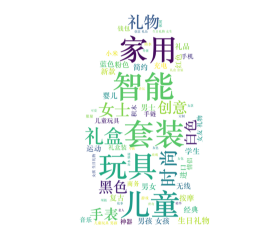

<Figure size 432x288 with 0 Axes>

In [65]:
from PIL import Image
from wordcloud import WordCloud
# 词云形状图片
WC_MASK_IMG = 'data/wawa.jpg'
WC_FONT_PATH = 'data/STZHONGS.TTF'

def create_word_cloud():
    """
    生成词云
    :return:
    """
    # 设置词云形状图片
    wc_mask = np.array(Image.open(WC_MASK_IMG))
    # 设置词云的一些配置，如：字体，背景色，词云形状，大小
    wc = WordCloud(background_color="white", max_words=2000, mask=wc_mask, scale=10,
                   max_font_size=50, random_state=42,font_path=WC_FONT_PATH)
    # 生成词云
    wc.generate(cut_word())

    # 在只设置mask的情况下,你将会得到一个拥有图片形状的词云
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.figure()
    plt.show()
create_word_cloud()